In [1]:
import numpy as np
import matplotlib.pyplot as plt
figure_size = (6,4)

u1 = np.array([1,2,1,2,2,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1])
u2 = np.array([21,12,21,32,22,22,12,21,21,22,22,22,21,21,21,22,22,22,21,21])
u3 = np.array([51,57,51,52,52,52,51,51,51,52,52,52,51,51,51,52,40,52,51,51])
u4 = np.array([21,12,21,32,22,22,12,21,21,22,22,22,21,21,21,22,22,22,21,21])
u5 = np.array([11,12,11,12,12,12,11,11,11,12,12,12,11,11,11,12,2,2,1,1])
u6 = np.array([1,2,1,2,2,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1])
u7 = np.array([11,12,11,12,12,12,11,11,11,12,12,12,11,11,11,12,2,2,1,1])

u = np.array([u1,u2,u3,u4,u5,u6,u7])
x = np.array([-2,-1,0,1,1.5,2,-1.5])

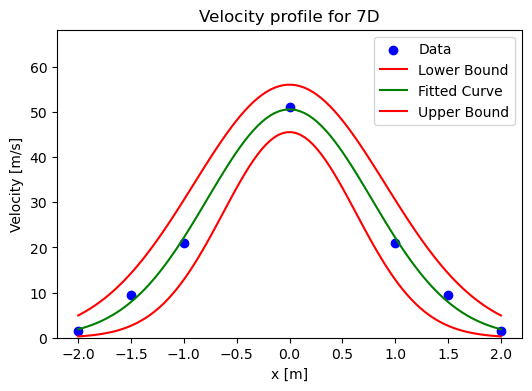

In [2]:
from scipy.optimize import curve_fit
import numpy as np
u_mean_l = np.mean(u,axis=1) - np.std(u,axis=1)*2
u_mean = np.mean(u,axis=1)
u_mean_h = np.mean(u,axis=1) + np.std(u,axis=1)*2

# Fit a bell curve
def bell_curve(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

popt_mean_l, pcov = curve_fit(bell_curve, x, u_mean_l)
popt_mean, pcov = curve_fit(bell_curve, x, u_mean)
popt_mean_h, pcov = curve_fit(bell_curve, x, u_mean_h)

# Generate x values for the curve
x_curve = np.linspace(min(x), max(x), 100)

# Plot the points and the fitted curve
plt.figure(figsize=figure_size)
plt.scatter(x, u_mean, label='Data', color='blue')
plt.plot(x_curve, bell_curve(x_curve, *popt_mean_l), color='red', label='Lower Bound')
plt.plot(x_curve, bell_curve(x_curve, *popt_mean), 'g-', label='Fitted Curve')
plt.plot(x_curve, bell_curve(x_curve, *popt_mean_h), color='red', label='Upper Bound')
plt.legend()
plt.ylim(0, max(u_mean_h)*1.2)
plt.title('Velocity profile for 7D')
plt.xlabel('x [m]')
plt.ylabel('Velocity [m/s]')
plt.show()




